In [81]:
import os
import pandas as pd

# Carregando o arquivo pré-processado em memória
pd.set_option('display.float_format', lambda x: '%.8f' % x)
script_directory = os.path.abspath('')
col_names = ['rtt_mean', 'rtt_min', 'rtt_max', 'stddev', 'pkt_was_lost']
dtype={'timestamp': 'int64',
       'rtt_mean': 'float64',
       'rtt_min': 'float64',
       'rtt_max': 'float64',
       'variance': 'float64',
       'pkt_was_lost': 'int64'}
df = pd.read_csv(str(script_directory) + "\\processed_file.csv",
                 header=0,
                 names=col_names,
                 dtype=dtype,
                 decimal=".")

df.head(20)

,rtt_mean,rtt_min,rtt_max,stddev,pkt_was_lost
0,109.13740000,95.00000000,187.00000000,29.56970000,1
1,128.25000000,120.00000000,137.00000000,4.94342900,1
2,81.46666000,73.30000000,103.00000000,8.42060900,1
3,74.95555000,72.00000000,84.30000000,3.77686200,1
4,75.10000000,72.10000000,82.60000000,3.76592900,1
5,104.07770000,97.70000000,109.00000000,3.06658600,1
6,97.70000000,94.70000000,101.00000000,2.30940100,1
7,78.77777000,73.10000000,87.20000000,4.89892900,1
8,65.68888000,61.00000000,74.60000000,4.74890500,1
9,73.11000000,73.00000000,73.20000000,0.07000000,0


In [82]:
# Validando balanceamento da classe de interesse
df['pkt_was_lost'].value_counts(normalize=True)*100

pkt_was_lost
1   50.00000000
0   50.00000000
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'rtt_mean'}>,
        <Axes: title={'center': 'rtt_min'}>],
       [<Axes: title={'center': 'rtt_max'}>,
        <Axes: title={'center': 'stddev'}>]], dtype=object)

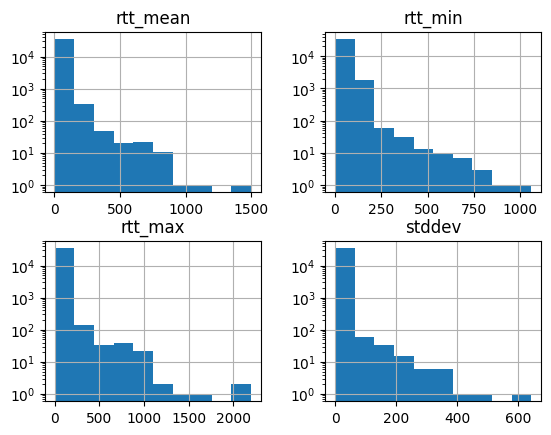

In [83]:
# Plotando histogramas em escala logarítmica
df.hist(column=['rtt_mean', 'rtt_min', 'rtt_max', 'stddev'], log=True)

In [86]:
# Matriz de correlação
print(df.corr())
print("\n\n")
print(df.corr().to_latex())

               rtt_mean    rtt_min    rtt_max     stddev  pkt_was_lost
rtt_mean     1.00000000 0.95051806 0.92124673 0.49911409    0.15701036
rtt_min      0.95051806 1.00000000 0.79744139 0.24792605    0.13828820
rtt_max      0.92124673 0.79744139 1.00000000 0.77499219    0.15846675
stddev       0.49911409 0.24792605 0.77499219 1.00000000    0.11903656
pkt_was_lost 0.15701036 0.13828820 0.15846675 0.11903656    1.00000000



\begin{tabular}{lrrrrr}
\toprule
 & rtt_mean & rtt_min & rtt_max & stddev & pkt_was_lost \\
\midrule
rtt_mean & 1.000000 & 0.950518 & 0.921247 & 0.499114 & 0.157010 \\
rtt_min & 0.950518 & 1.000000 & 0.797441 & 0.247926 & 0.138288 \\
rtt_max & 0.921247 & 0.797441 & 1.000000 & 0.774992 & 0.158467 \\
stddev & 0.499114 & 0.247926 & 0.774992 & 1.000000 & 0.119037 \\
pkt_was_lost & 0.157010 & 0.138288 & 0.158467 & 0.119037 & 1.000000 \\
\bottomrule
\end{tabular}



In [87]:
# Total de linhas do dataset
df.shape[0]

35988

In [88]:
# Indexando as classes
feature_cols = ['rtt_mean', 'rtt_min', 'rtt_max', 'stddev']
x = df[feature_cols]

feature_target = ['pkt_was_lost']
y = df[feature_target]

In [89]:
# Dividindo o dataset entre treino e validação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [91]:
# Treinando os modelos 1 a 8.
# No artigo, o modelo 1 vira 4 e o 5 vira 8.
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion='entropy',
                             splitter='best',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt1.fit(X_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy',
                             splitter='best',
                             max_depth=4,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt2.fit(X_train, y_train)

dt3 = DecisionTreeClassifier(criterion='entropy',
                             splitter='best',
                             max_depth=16,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt3.fit(X_train, y_train)

dt4 = DecisionTreeClassifier(criterion='entropy',
                             splitter='best',
                             max_depth=32,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt4.fit(X_train, y_train)

dt5 = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt5.fit(X_train, y_train)

dt6 = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=4,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt6.fit(X_train, y_train)

dt7 = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=16,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt7.fit(X_train, y_train)

dt8 = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=32,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt8.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=32, random_state=123)

In [92]:
# Realizando as previsões em cima do conjunto de validação
y_pred1 = dt1.predict(X_test)
y_pred2 = dt2.predict(X_test)
y_pred3 = dt3.predict(X_test)
y_pred4 = dt4.predict(X_test)
y_pred5 = dt5.predict(X_test)
y_pred6 = dt6.predict(X_test)
y_pred7 = dt7.predict(X_test)
y_pred8 = dt8.predict(X_test)

In [111]:
# Imprimindo as métricas. Poderia ter sido um loop, mas enfim...
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Test accuracy dt1: ', accuracy_score(y_test, y_pred1))
print('Test precision dt1: ', precision_score(y_test, y_pred1))
print('Test recall dt1: ', recall_score(y_test, y_pred1))
print('Test f1-score dt1: ', f1_score(y_test, y_pred1))
print('\n')
print('Test accuracy dt2: ', accuracy_score(y_test, y_pred2))
print('Test precision dt2: ', precision_score(y_test, y_pred2))
print('Test recall dt2: ', recall_score(y_test, y_pred2))
print('Test f1-score dt2: ', f1_score(y_test, y_pred2))
print('\n')
print('Test accuracy dt3: ', accuracy_score(y_test, y_pred3))
print('Test precision dt3: ', precision_score(y_test, y_pred3))
print('Test recall dt3: ', recall_score(y_test, y_pred3))
print('Test f1-score dt3: ', f1_score(y_test, y_pred3))
print('\n')
print('Test accuracy dt4: ', accuracy_score(y_test, y_pred4))
print('Test precision dt4: ', precision_score(y_test, y_pred4))
print('Test recall dt4: ', recall_score(y_test, y_pred4))
print('Test f1-score dt4: ', f1_score(y_test, y_pred4))
print('\n')
print('Test accuracy dt5: ', accuracy_score(y_test, y_pred5))
print('Test precision dt5: ', precision_score(y_test, y_pred5))
print('Test recall dt5: ', recall_score(y_test, y_pred5))
print('Test f1-score dt5: ', f1_score(y_test, y_pred5))
print('\n')
print('Test accuracy dt6: ', accuracy_score(y_test, y_pred6))
print('Test precision dt6: ', precision_score(y_test, y_pred6))
print('Test recall dt6: ', recall_score(y_test, y_pred6))
print('Test f1-score dt6: ', f1_score(y_test, y_pred6))
print('\n')
print('Test accuracy dt7: ', accuracy_score(y_test, y_pred7))
print('Test precision dt7: ', precision_score(y_test, y_pred7))
print('Test recall dt7: ', recall_score(y_test, y_pred7))
print('Test f1-score dt7: ', f1_score(y_test, y_pred7))
print('\n')
print('Test accuracy dt8: ', accuracy_score(y_test, y_pred8))
print('Test precision dt8: ', precision_score(y_test, y_pred8))
print('Test recall dt8: ', recall_score(y_test, y_pred8))
print('Test f1-score dt8: ', f1_score(y_test, y_pred8))


Test accuracy dt1:  0.8231453181439289
Test precision dt1:  0.8238557558945908
Test recall dt1:  0.823170731707317
Test f1-score dt1:  0.8235131013447942


Test accuracy dt2:  0.7049180327868853
Test precision dt2:  0.7049723756906078
Test recall dt2:  0.7073170731707317
Test f1-score dt2:  0.7061427780852241


Test accuracy dt3:  0.79244234509586
Test precision dt3:  0.7985875706214689
Test recall dt3:  0.7835365853658537
Test f1-score dt3:  0.7909904868494684


Test accuracy dt4:  0.811058627396499
Test precision dt4:  0.8228029867892016
Test recall dt4:  0.7940687361419069
Test f1-score dt4:  0.8081805359661495


Test accuracy dt5:  0.8205056960266741
Test precision dt5:  0.8229224762967094
Test recall dt5:  0.8179046563192904
Test f1-score dt5:  0.8204058938003892


Test accuracy dt6:  0.7049180327868853
Test precision dt6:  0.705085682697623
Test recall dt6:  0.707039911308204
Test f1-score dt6:  0.706061444782729


Test accuracy dt7:  0.8139761044734648
Test precision dt7:  0.815

In [95]:
# Profundidade das árvores dt1 e dt5
print(dt1.get_depth())
print(dt5.get_depth())

54
50


array([[<Axes: title={'center': 'rtt_mean'}>,
        <Axes: title={'center': 'rtt_min'}>],
       [<Axes: title={'center': 'rtt_max'}>,
        <Axes: title={'center': 'stddev'}>]], dtype=object)

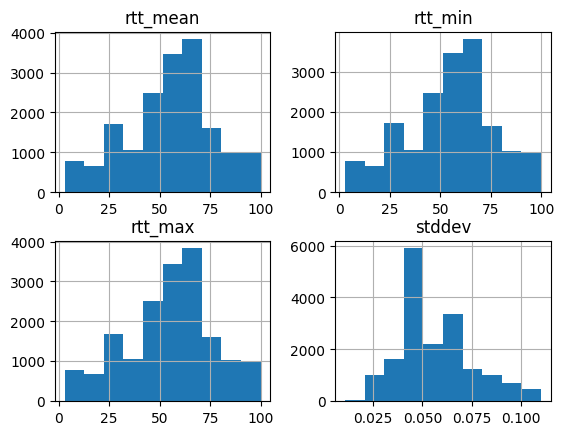

In [96]:
# Criando segundo dataset, eliminando desvios padrões altos
df2 = df.drop(df[df.stddev > 0.11].index)
#df2 = df2.drop(df2[df2.stddev < 0.025].index)
df2.hist(['rtt_mean', 'rtt_min', 'rtt_max', 'stddev'])

In [97]:
# Verificando balanceamento das classes de interesse
print(df2['pkt_was_lost'].value_counts(normalize=True)*100)

pkt_was_lost
0   70.30585031
1   29.69414969
Name: proportion, dtype: float64


In [98]:
# Tamanho do novo dataset
df2.shape[0]

17623

In [99]:
# Matriz de correção do novo dataset
print(df2.corr())
print("\n")
print(df2.corr().to_latex())

               rtt_mean    rtt_min    rtt_max     stddev  pkt_was_lost
rtt_mean     1.00000000 0.99999834 0.99999686 0.21665030    0.07936845
rtt_min      0.99999834 1.00000000 0.99999413 0.21559255    0.07933984
rtt_max      0.99999686 0.99999413 1.00000000 0.21854343    0.07932322
stddev       0.21665030 0.21559255 0.21854343 1.00000000    0.07067250
pkt_was_lost 0.07936845 0.07933984 0.07932322 0.07067250    1.00000000


\begin{tabular}{lrrrrr}
\toprule
 & rtt_mean & rtt_min & rtt_max & stddev & pkt_was_lost \\
\midrule
rtt_mean & 1.000000 & 0.999998 & 0.999997 & 0.216650 & 0.079368 \\
rtt_min & 0.999998 & 1.000000 & 0.999994 & 0.215593 & 0.079340 \\
rtt_max & 0.999997 & 0.999994 & 1.000000 & 0.218543 & 0.079323 \\
stddev & 0.216650 & 0.215593 & 0.218543 & 1.000000 & 0.070672 \\
pkt_was_lost & 0.079368 & 0.079340 & 0.079323 & 0.070672 & 1.000000 \\
\bottomrule
\end{tabular}



In [100]:
# Indexando as classes do novo dataset
feature_cols2 = ['rtt_mean', 'rtt_min', 'rtt_max', 'stddev']
x2 = df2[feature_cols2]

feature_target2 = ['pkt_was_lost']
y2 = df2[feature_target2]

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=123)

In [105]:
# Treinando novos modelos e realizando as previsões
from sklearn.tree import DecisionTreeClassifier

dt9 = DecisionTreeClassifier(criterion='entropy',
                             splitter='best',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt9.fit(X2_train, y2_train)

dt10 = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=123,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None,
                             ccp_alpha=0.0)
dt10.fit(X2_train, y2_train)

y_pred9 = dt9.predict(X2_test)
y_pred10 = dt10.predict(X2_test)

In [106]:
# Profundidade dos novos modelos
print("dt9: " + str(dt9.get_depth()))
print("dt10: " + str(dt10.get_depth()))

dt9: 40
dt10: 37


In [107]:
# Métricas dos modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Test accuracy dt9: ', accuracy_score(y2_test, y_pred9))
print('Test precision dt9: ', precision_score(y2_test, y_pred9))
print('Test recall dt9: ', recall_score(y2_test, y_pred9))
print('Test f1-score dt9: ', f1_score(y2_test, y_pred9))
print('\n')

print('Test accuracy dt10: ', accuracy_score(y2_test, y_pred10))
print('Test precision dt10: ', precision_score(y2_test, y_pred10))
print('Test recall dt10: ', recall_score(y2_test, y_pred10))
print('Test f1-score dt10: ', f1_score(y2_test, y_pred10))
print('\n')

Test accuracy dt9:  0.9739007092198582
Test precision dt9:  0.9690222652468539
Test recall dt9:  0.943449575871819
Test f1-score dt9:  0.956064947468959


Test accuracy dt10:  0.9741843971631206
Test precision dt10:  0.970873786407767
Test recall dt10:  0.942507068803016
Test f1-score dt10:  0.9564801530368244




In [108]:
# Montando dataset com todos os dados originais.
# Aproveito para ver a proporção da classe de perda de pacotes.

import os
import pandas as pd

script_directory3 = os.path.abspath('')
file_path3 = os.listdir(str(script_directory3) + '\\json_data_2\\')

pd.set_option('display.float_format', lambda x: '%.8f' % x)
col_names3 = ['timestamp', 'rtt_mean', 'rtt_min', 'rtt_max', 'variance', 'stddev', 'pkt_was_lost']
dtype3={'timestamp': 'int64',
       'rtt_mean': 'float64',
       'rtt_min': 'float64',
       'rtt_max': 'float64',
       'variance': 'float64',
       'stddev': 'float64',
       'pkt_was_lost': 'int64'}

df3 = pd.DataFrame()

for file in file_path3:
    path = str(script_directory3) + '\\json_data_2\\' + file
    try:
        df_tmp = pd.read_csv(path, header=None, decimal=".")
    except:
        continue
    df3 = pd.concat([df3, df_tmp])

df3.columns = col_names3
df3.astype(dtype3)
df3 = df3.drop(columns=['timestamp', 'variance'])

df4 = df3.copy()

df4['pkt_was_lost'] = (df4['pkt_was_lost']*10).astype(int)
df4['pkt_was_lost'].replace([2,3,4,5,6,7,8,9], 1, inplace=True)

print(df4['pkt_was_lost'].value_counts(normalize=True)*100)



pkt_was_lost
0   99.35874938
1    0.64125062
Name: proportion, dtype: float64


C:\Users\romul\AppData\Local\Temp\ipykernel_3548\2063198031.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['pkt_was_lost'].replace([2,3,4,5,6,7,8,9], 1, inplace=True)


In [110]:
# Indexando colunas de interesse, realizando as previsões e imprimindo métricas
feature_cols4 = ['rtt_mean', 'rtt_min', 'rtt_max', 'stddev']
x4 = df4[feature_cols]

feature_target4 = ['pkt_was_lost']
y4 = df4[feature_target]

#from sklearn.model_selection import train_test_split
#X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=1, random_state=123)

y_pred11 = dt1.predict(x4)
y_pred12 = dt8.predict(x4)
y_pred13 = dt9.predict(x4)
y_pred14 = dt10.predict(x4)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Test accuracy dt1: ', accuracy_score(y4, y_pred11))
print('Test precision dt1: ', precision_score(y4, y_pred11))
print('Test recall dt1: ', recall_score(y4, y_pred11))
print('Test f1-score dt1: ', f1_score(y4, y_pred11))
print('\n')
print('Test accuracy dt8: ', accuracy_score(y4, y_pred12))
print('Test precision dt8: ', precision_score(y4, y_pred12))
print('Test recall dt8: ', recall_score(y4, y_pred12))
print('Test f1-score dt8: ', f1_score(y4, y_pred12))
print('\n')
print('Test accuracy dt9: ', accuracy_score(y4, y_pred13))
print('Test precision dt9: ', precision_score(y4, y_pred13))
print('Test recall dt9: ', recall_score(y4, y_pred13))
print('Test f1-score dt9: ', f1_score(y4, y_pred13))
print('\n')
print('Test accuracy dt10: ', accuracy_score(y4, y_pred14))
print('Test precision dt10: ', precision_score(y4, y_pred14))
print('Test recall dt10: ', recall_score(y4, y_pred14))
print('Test f1-score dt10: ', f1_score(y4, y_pred14))
print('\n')

Test accuracy dt1:  0.8586210290014851
Test precision dt1:  0.04184216735465272
Test recall dt1:  0.9610968018888173
Test f1-score dt1:  0.08019306151597168


Test accuracy dt8:  0.8660028435797172
Test precision dt8:  0.043524400453045745
Test recall dt8:  0.9485404593260356
Test f1-score dt8:  0.08322974932670396


Test accuracy dt9:  0.9430719744986229
Test precision dt9:  0.036350888717644234
Test recall dt9:  0.30881090362738783
Test f1-score dt9:  0.06504515297761


Test accuracy dt10:  0.9429016487532156
Test precision dt10:  0.036208383972594974
Test recall dt10:  0.3085426057093797
Test f1-score dt10:  0.06481100547230316


